### Module 4 Project | Image Classification Algorithm | X-Ray Imaging to Detect Pneumonia Case

#### Goal

The goal is to create a machine learning algorithm that will successfully classify images into 2 categories.

* Positive for Pneumonia
* Negative for Pneumonia

The metric of success for this will be a high recall. This is due to the fact we want to reduce the number of False Negatives that are produced. We want to make sure we limit the amount of cases that are actually a pneumonia case, but labeled as healthy.

#### Methodology

The methodology that will be used for this project will be the OSEMN Methodology. I will outline the methodology below.

* Obtain: Gather data from relevant sources
* Scrub: Clean data to formats that machine understands
* Explore: Find significant patterns and trends using statistical methods
* Model: Construct models to predict and forecast
* iNterpret: Put results into good use

#### Data

This will be our Obtain step in our OSEMN as we did not need to do much data mining for this data set.

Our data was obtained from [Here](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) which is a dataset of thousands of chest x-ray images from both patients who have pneumonia and who do not. This labeled data will allow us to create a classification machine in order to determine whether a patient has a case of pneumonia based of a chest x-ray.

A larger set of the same data can be found [Here](https://data.mendeley.com/datasets/rscbjbr9sj/3). Due to technical limitations and the fact that there is no funds for this project we will not be using distributed networks to run this project, which limits the amount of data we can realistically work with while maintaining feasibility. 

In [1]:
#importing all neccessary libraries
from keras.preprocessing.image import ImageDataGenerator
import datetime
from keras import layers, models, optimizers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
%matplotlib inline


Using TensorFlow backend.


___
### Scrub

Here we will load the data, and begin to format it into the required format for our machine to understand it. 

First we need to load our images in order to begin processing our images down to the proper resolution, and begin creating our matrices for modeling.

We will also be timing our entire notebook to get a better sense of how long this would take beginning to finish.

In [2]:
# here we will instance 'current time' this will allow us to see how long the whole notebook takes
start_time = datetime.datetime.now()

Here we will begin to load in our data into 3 separate categories. 

* Training
* Validation
* Testing

In [3]:
#determine file paths
train_path = '../data/train'
test_path = '../data/test'
val_path = '../data/val'
#instance ImageDataGenerator for rescaling
train_IDG = ImageDataGenerator(rescale=1./255)
test_IDG = ImageDataGenerator(rescale=1./255)

# use our IDG to load and scale images

train_gen = train_IDG.flow_from_directory(train_path, target_size=(150,150), batch_size=20, class_mode='binary')

test_gen = test_IDG.flow_from_directory(test_path, target_size = (150,150), batch_size = 20, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Now that we have loaded our train and validation data we will begin to explore this data below. Once we have explored the data we will begin to create a baseline model, tune this model, then create a reusable pipeline to carryout or steps easily.

___
### Explore

This stage we will take a look into our data and see if we can notice anything. However the difficulty we will have here is that our data is in an image format, it could prove difficult to apply proper EDA to this data set. However, the main goal here is to express how it can prove difficult, and in some cases impossible to identify a case of pneumonia with the naked eye.

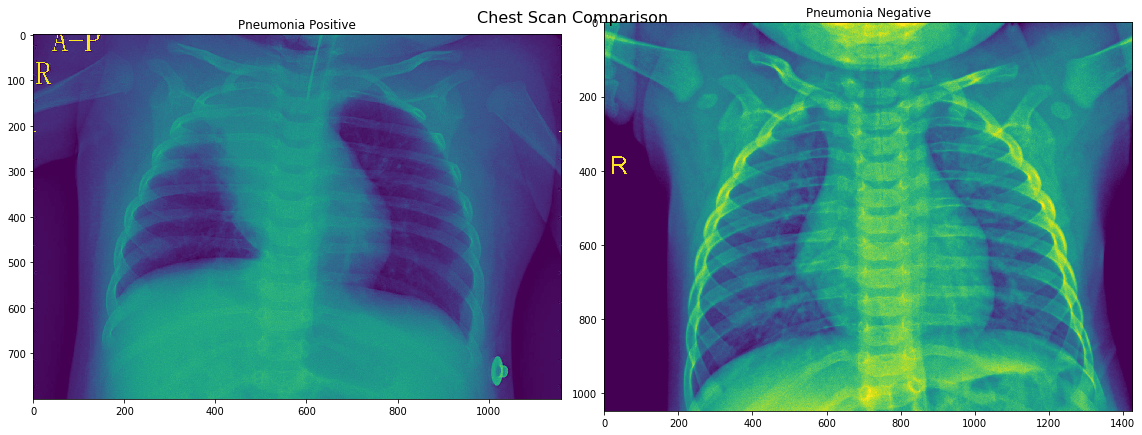

In [4]:
# here we will display 2 images from out dataset, one will be 
# positive for pneumonia the other will be negative,
# this will demonstrate how difficult it can be to determine a case
jpgPath = ['../data/train/PNEUMONIA/person1922_bacteria_4830.jpeg',
           '../data/train/NORMAL/IM-0207-0001.jpeg']
positiveIMG = plt.imread(jpgPath[0])
negativeIMG = plt.imread(jpgPath[1])

NUM_ROWS = 1
IMG_PER_ROW = 2
f, ax = plt.subplots(NUM_ROWS, IMG_PER_ROW, figsize=(16,6))

ax[0].imshow(positiveIMG)
ax[1].imshow(negativeIMG)

ax[0].set_title('Pneumonia Positive')
ax[1].set_title('Pneumonia Negative')

title = 'Chest Scan Comparison'

f.suptitle(title, fontsize = 16)
plt.tight_layout()
plt.show()



If we take a look at the images above we can see that further analysis of the lungs themselves it seems fairly trivial determining the difference with the naked eye. Due to the method used to display the images the colors are a bit off, however we can still see a bit of a difference between these two images. 

___
### Model

This is where we get into the meat and potatoes of our analysis. We will begin to test different algorithms in order to maximize the performance of our model. 

In [5]:
# establish model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150,150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(.5))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(.5))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Now that we have a beginning baseline model created with a good number of layers, we will now train our model and fit to our train data.

In [7]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit_generator(train_gen,
                             steps_per_epoch=100,
                             epochs=50,
                             validation_data=test_gen,
                             validation_steps=50,
                             callbacks = [es])

Epoch 1/50
100/100 [==============================] - 93s 933ms/step - loss: 0.5966 - acc: 0.7125 - val_loss: 0.6757 - val_acc: 0.6250
Epoch 2/50
100/100 [==============================] - 104s 1s/step - loss: 0.5350 - acc: 0.7545 - val_loss: 0.6562 - val_acc: 0.6219
Epoch 3/50
100/100 [==============================] - 76s 765ms/step - loss: 0.4908 - acc: 0.7637 - val_loss: 0.6357 - val_acc: 0.8303
Epoch 4/50
100/100 [==============================] - 85s 852ms/step - loss: 0.4756 - acc: 0.7765 - val_loss: 0.6010 - val_acc: 0.8233
Epoch 5/50
100/100 [==============================] - 83s 835ms/step - loss: 0.4773 - acc: 0.7720 - val_loss: 0.5937 - val_acc: 0.7947
Epoch 6/50
100/100 [==============================] - 88s 877ms/step - loss: 0.4634 - acc: 0.7821 - val_loss: 0.5877 - val_acc: 0.8079
Epoch 7/50
100/100 [==============================] - 85s 852ms/step - loss: 0.4262 - acc: 0.8050 - val_loss: 0.5723 - val_acc: 0.8079
Epoch 8/50
100/100 [==============================] - 88s

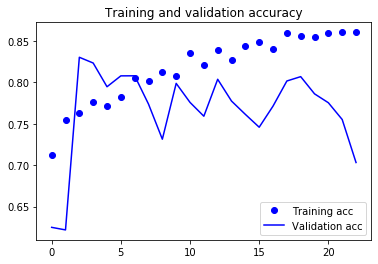

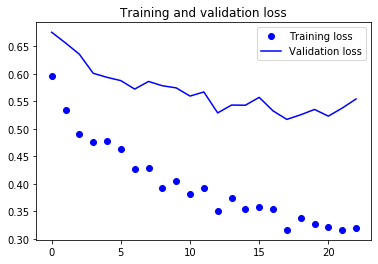

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
end = datetime.datetime.now()
time_elapsed = end - start_time
print('It took {} to train and compile our model.'.format(time_elapsed))

It took 0:34:26.854616 to train and compile our model.


In [10]:
model.save('chest_xray_CNN.h5')

#### Data Augmentation

Since we are using a smaller data set than the original, we will be implementing Data Augmentation in order to make up for this.

In [11]:
# we will time our data augmentation as well
start_time = datetime.datetime.now()

In [12]:
# instance another IDG 
train_IDG = ImageDataGenerator(rotation_range= 40, 
                              width_shift_range=.2,
                              height_shift_range = .2,
                              shear_range=.2,
                              zoom_range = .2,
                              horizontal_flip = True,
                              fill_mode='nearest')
# run our test through IDG
test_IDG = ImageDataGenerator(rescale = 1./255)

# run images through IDG
train_gen = train_IDG.flow_from_directory(train_path, target_size = (150,150), batch_size = 32, class_mode='binary')

# run val set through IDG
test_gen = train_IDG.flow_from_directory(test_path, target_size = (150,150), batch_size = 32, class_mode = 'binary')

#fit data augmented model
history = model.fit_generator(train_gen,
                   steps_per_epoch = 100,
                   epochs = 50,
                   validation_data = test_gen,
                   validation_steps=50,
                   callbacks = [es])

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 175s 2s/step - loss: 4.0085 - acc: 0.7478 - val_loss: 5.9238 - val_acc: 0.6276
Epoch 2/50
100/100 [==============================] - 164s 2s/step - loss: 4.2527 - acc: 0.7331 - val_loss: 5.7796 - val_acc: 0.6353
Epoch 3/50
100/100 [==============================] - 150s 1s/step - loss: 3.9957 - acc: 0.7494 - val_loss: 5.9275 - val_acc: 0.6276
Epoch 4/50
100/100 [==============================] - 162s 2s/step - loss: 4.2604 - acc: 0.7328 - val_loss: 5.3897 - val_acc: 0.6591
Epoch 5/50
100/100 [==============================] - 185s 2s/step - loss: 3.9214 - acc: 0.7537 - val_loss: 6.0080 - val_acc: 0.6224
Epoch 6/50
100/100 [==============================] - 160s 2s/step - loss: 4.1901 - acc: 0.7372 - val_loss: 5.8581 - val_acc: 0.6308
Epoch 7/50
100/100 [==============================] - 149s 1s/step - loss: 4.0603 - acc: 0.7453 - val_loss: 5.9400 - va

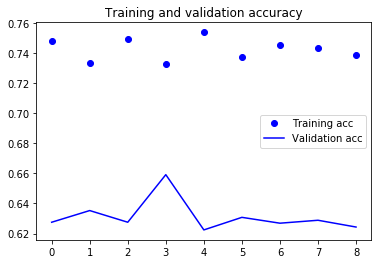

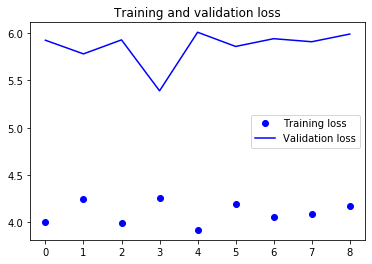

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
end = datetime.datetime.now()
time_elapsed = end - start_time
print('With Data Augmentation it took {} to train our model'.format(time_elapsed))

With Data Augmentation it took 0:24:51.738263 to train our model


In [15]:
# save model
model.save('chest_xray_model_with_data_augmentation.h5')

#### Model Evaluation

Here we will take a look at how our model performed on our test data. The main metric for success here is a high recall value, however since accuracy takes our recall and precision scores into account that is what we will use for this evaluation.

We will dive deeper into a confusion matrix, and other metrics of success for our model later on.

In [16]:
val_gen = test_IDG.flow_from_directory(val_path,
                                           target_size = (150, 150),
                                           batch_size = 30,
                                           class_mode = 'binary')

val_loss, val_acc= model.evaluate_generator(val_gen, steps = 50)
print('accuracy is:', val_acc)

Found 16 images belonging to 2 classes.
accuracy is: 0.625


As we can see above we obtained a test accuracy of 63.2%. This is pretty good for the small sample size we do have, with this method more data will always increase the accuracy.

___
### iNterpret

Here we will begin to take a look ar our results. Understand what they mean, and how we can apply our outcome to larger datasets, and begin to look into productionizing our model.

The best way to analyze how we can apply this to larger datasets, and look at productionizing our model is to look at a list of future work topics and how more time and research could improve our model. 

With a dataset of roughly 5000+ images we managed to obtain a 63.2% accuracy using our 620+ test images. These results are not the greatest, however with the small sample size we do have it performed decently well. 

We will now take a look at a number of Future Work topics we can explore to increase model performance.

* Simply obtain more data that we can use more powerful distributed computational networks to process
* Take a deeper look into other performance metrics such as Recall
* Research additional opportunities for creating a production model, such as a Streamlet app, or an AWS hosted site. 

### Conclusion

To the untrained eye it could prove close to impossible to determine if a patient has pneumonia or not based solely on a chest x-ray. However through the increasing success of machine learning and deep learning models we can begin to automate a diagnosis. Using a Convoluted Neural Network we have successfully created a model that can classify a chest scan to detemine whether it is positive or negative for pneumonia with 63% accuracy.